<a href="https://colab.research.google.com/github/khee0915/capstone/blob/main/data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
cd /content/drive/MyDrive/Github

/content/drive/MyDrive/Github


# api데이터 확인

In [ ]:
!pip install requests

In [ ]:
import requests
import pandas as pd

In [ ]:
apikey = '64537665486b68653839754d755173'

In [ ]:
import requests
import xml.etree.ElementTree as ET

# API URL
url = "http://openapi.seoul.go.kr:8088/64537665486b68653839754d755173/xml/TnJbhntBassOpen/1/5/"

# API 요청
response = requests.get(url)

if response.status_code == 200:
    xml_data = response.content

    root = ET.fromstring(xml_data)

    total_count = root.find("list_total_count").text
    print(f"총 데이터 개수: {total_count}")

    rows = root.findall("row")
    print(f"응답에 포함된 데이터 개수: {len(rows)}")

else:
    print(f"API 요청 실패: {response.status_code}")


총 데이터 개수: 1
응답에 포함된 데이터 개수: 1


#**CSV데이터 분석 - 연령을 중심으로 분석 진행**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/캡스톤/서울일자리포털_인재정보_직종별,지역별_목록_20250325.csv", encoding="euc-kr")

# 1. 데이터 전처리: 불필요한 칼럼 제거

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JBHNT_REQST_NO                3683 non-null   object 
 1   SEX                           3683 non-null   object 
 2   AGE                           3683 non-null   int64  
 3   ACDMCR_CMMN_CODE_SE           3683 non-null   object 
 4   ACDMCR_CMMN_CODE_NM           3683 non-null   object 
 5   WORK_AREA_CMMN_CODE_SE_1_1    3522 non-null   object 
 6   WORK_AREA_CMMN_CODE_SE_1_2    3280 non-null   object 
 7   WORK_AREA_CMMN_CODE_SE_2_1    2989 non-null   object 
 8   WORK_AREA_CMMN_CODE_SE_2_2    1366 non-null   object 
 9   HOPE_JSSFC_CMMN_CODE_SE_1     3683 non-null   int64  
 10  HOPE_JSSFC_CMMN_CODE_SE_NM_1  3683 non-null   object 
 11  HOPE_JSSFC_CAREER_YY_CO_1     1683 non-null   float64
 12  HOPE_JSSFC_CAREER_MONTH_CO_1  1683 non-null   float64
 13  HOP

,JBHNT_REQST_NO,SEX,AGE,ACDMCR_CMMN_CODE_SE,ACDMCR_CMMN_CODE_NM,WORK_AREA_CMMN_CODE_SE_1_1,WORK_AREA_CMMN_CODE_SE_1_2,WORK_AREA_CMMN_CODE_SE_2_1,WORK_AREA_CMMN_CODE_SE_2_2,HOPE_JSSFC_CMMN_CODE_SE_1,...,HOPE_JSSFC_CAREER_YY_CO_1,HOPE_JSSFC_CAREER_MONTH_CO_1,HOPE_JSSFC_CAREER_YY_MM,JBHNT_CRTFC_STTUS_CMMN_SE,JBHNT_CRTFC_STTUS_CMMN_SE_NM,SEARCH_KWRD_1,SEARCH_KWRD_2,SEARCH_KWRD_3,SEARCH_KWRD_4,SEARCH_KWRD_5
0,H103202409302766,여,67,J00106,고등학교,서울,강서구,서울,NaN,550200,...,10.0,0.0,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN
1,H103202409302619,남,65,J00110,대학_대학교,경기,김포시,NaN,NaN,542000,...,NaN,NaN,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN
2,H103202409302613,여,62,J00106,고등학교,서울,강서구,서울,NaN,232100,...,10.0,0.0,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN
3,H103202409302600,여,57,J00108,전문대학,서울,강서구,서울,NaN,29900,...,NaN,NaN,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN
4,H103202409302599,여,64,J00106,고등학교,서울,NaN,NaN,NaN,215301,...,10.0,0.0,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 불필요한 컬럼 제거
drop_cols = [
    "JBHNT_REQST_NO", "ACDMCR_CMMN_CODE_SE",
    "WORK_AREA_CMMN_CODE_SE_1_2", "WORK_AREA_CMMN_CODE_SE_2_1", "WORK_AREA_CMMN_CODE_SE_2_2",
    "HOPE_JSSFC_CMMN_CODE_SE_1", "HOPE_JSSFC_CAREER_YY_MM",
    "JBHNT_CRTFC_STTUS_CMMN_SE", "JBHNT_CRTFC_STTUS_CMMN_SE_NM",
    "SEARCH_KWRD_2", "SEARCH_KWRD_3", "SEARCH_KWRD_4", "SEARCH_KWRD_5"
]

df_cleaned = df.drop(columns=drop_cols)

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SEX                           3683 non-null   object 
 1   AGE                           3683 non-null   int64  
 2   ACDMCR_CMMN_CODE_NM           3683 non-null   object 
 3   WORK_AREA_CMMN_CODE_SE_1_1    3522 non-null   object 
 4   HOPE_JSSFC_CMMN_CODE_SE_NM_1  3683 non-null   object 
 5   HOPE_JSSFC_CAREER_YY_CO_1     1683 non-null   float64
 6   HOPE_JSSFC_CAREER_MONTH_CO_1  1683 non-null   float64
 7   SEARCH_KWRD_1                 299 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 230.3+ KB


# 2. 데이터 통계 및 시각화

**1) 전체 구직자의 연령 및 성별 분포 시각화**

In [ ]:
# 연령대별 구직자 수
age_stats = df_cleaned["AGE"].describe()
print("전체 구직자의 연령 통계:")
print(age_stats)
print("\n-----------------------------------------------------")

# 연령대별 구직자 수 (10대 ~ 70대 이상)
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned["AGE"], bins=[0, 20, 30, 40, 50, 60, 70, 100],
                                 labels=["10대", "20대", "30대", "40대", "50대", "60대", "70대 이상"])
age_group_counts = df_cleaned['AGE_GROUP'].value_counts().sort_index()
print("\n연령대별 구직자 수:")
print(age_group_counts)
print("\n-----------------------------------------------------")

gender_counts = df_cleaned["SEX"].value_counts()
print("\n성별 구직자 분포:")
print(gender_counts)


전체 구직자의 연령 통계:
count    3683.000000
mean       67.591366
std         6.329106
min        17.000000
25%        64.000000
50%        68.000000
75%        72.000000
max        88.000000
Name: AGE, dtype: float64

-----------------------------------------------------

연령대별 구직자 수:
AGE_GROUP
10대          8
20대          0
30대          0
40대          6
50대        415
60대       2075
70대 이상    1179
Name: count, dtype: int64

-----------------------------------------------------

성별 구직자 분포:
SEX
남    2480
여    1203
Name: count, dtype: int64


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

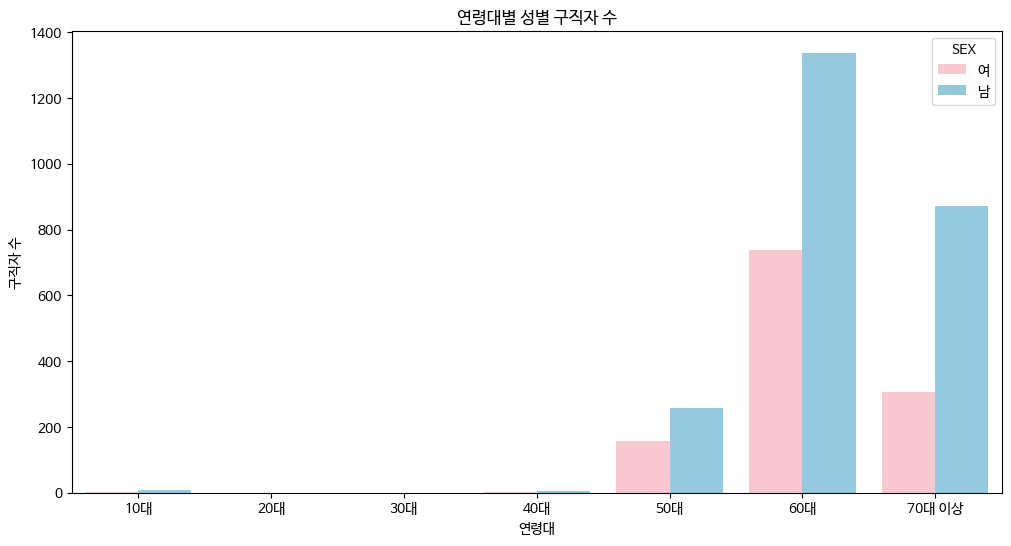

In [ ]:
#연령대별 성별 구직자 수 시각화

plt.figure(figsize=(12, 6))
sns.countplot(x="AGE_GROUP", hue="SEX", data=df_cleaned,  palette={"남": "skyblue", "여": "pink"})
plt.title("연령대별 성별 구직자 수")
plt.xlabel("연령대")
plt.ylabel("구직자 수")
plt.show()

**2) 시니어 (50세 이상) 구직자 중심 희망 직종 분석**

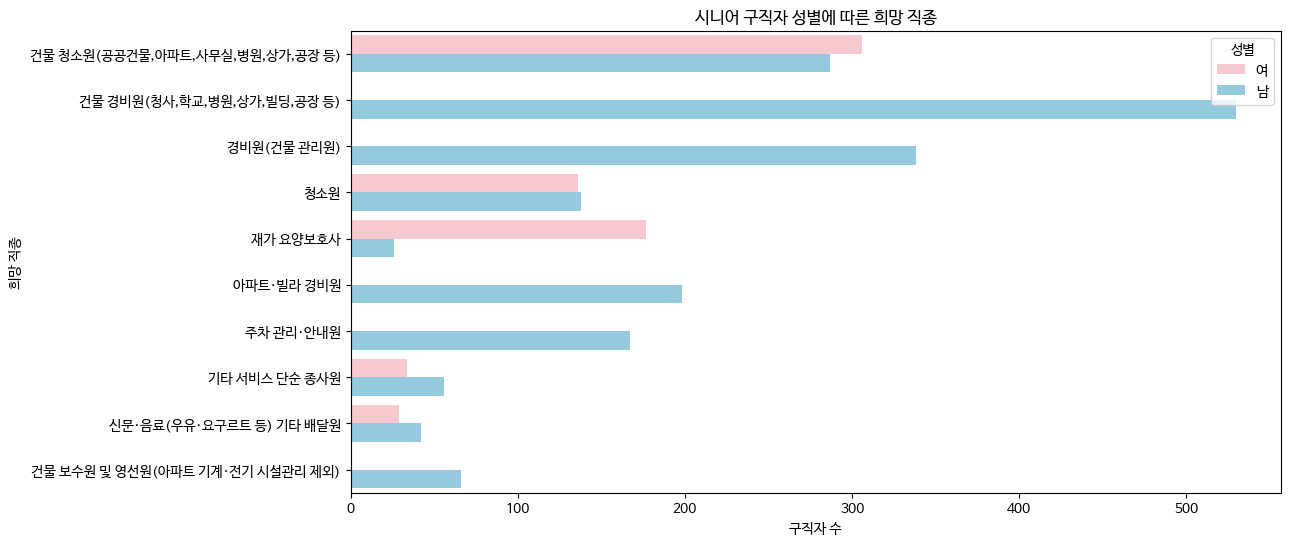

In [ ]:
# 50세 이상 구직자
senior_df = df_cleaned[df_cleaned["AGE"] >= 50]

#그래프 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y="HOPE_JSSFC_CMMN_CODE_SE_NM_1", data=senior_df,
              order=senior_df["HOPE_JSSFC_CMMN_CODE_SE_NM_1"].value_counts().index[:10],
              hue="SEX", palette={"남": "skyblue", "여": "pink"})
plt.title("시니어 구직자 성별에 따른 희망 직종")
plt.xlabel("구직자 수")
plt.ylabel("희망 직종")
plt.legend(title="성별", loc="upper right")
plt.show()



**3) 시니어 검색 키워드 시각화**

In [ ]:
# 원본 데이터에서 검색 키워드 컬럼 추출
keywords = df[["SEARCH_KWRD_1", "SEARCH_KWRD_2", "SEARCH_KWRD_3", "SEARCH_KWRD_4", "SEARCH_KWRD_5"]].values.flatten()

# NaN 값 제거
keywords = pd.Series(keywords).dropna()

# 상위 10개 검색 키워드 출력
keyword_counts = keywords.value_counts().head(10)

print("\n시니어 구직자의 주요 검색 키워드 (상위 10개):")
print(keyword_counts)




시니어 구직자의 주요 검색 키워드 (상위 10개):
경비       36
청소       30
공공일자리    19
주차관리     15
청소원      15
미화       11
고취업      11
경비원      11
관리        8
단순        7
Name: count, dtype: int64


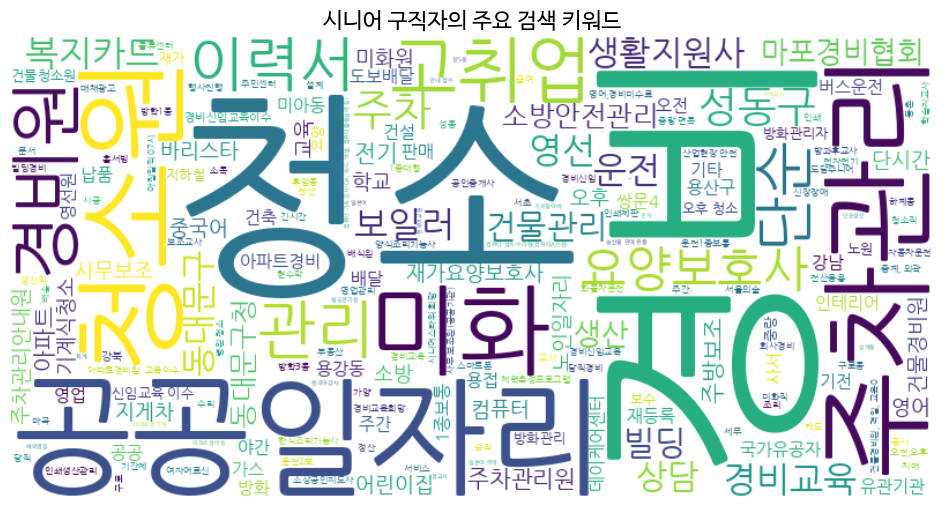

In [ ]:
# 데이터에서 검색 키워드 컬럼 추출
keywords = df[["SEARCH_KWRD_1", "SEARCH_KWRD_2", "SEARCH_KWRD_3", "SEARCH_KWRD_4", "SEARCH_KWRD_5"]].values.flatten()

# NaN 값 제거
keywords = pd.Series(keywords).dropna()

# 전체 키워드 빈도 계산
keyword_counts = keywords.value_counts()

# 워드 클라우드 생성
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate_from_frequencies(keyword_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("시니어 구직자의 주요 검색 키워드", fontsize=16)
plt.show()


**4) 학력별 희망 직종 분석**

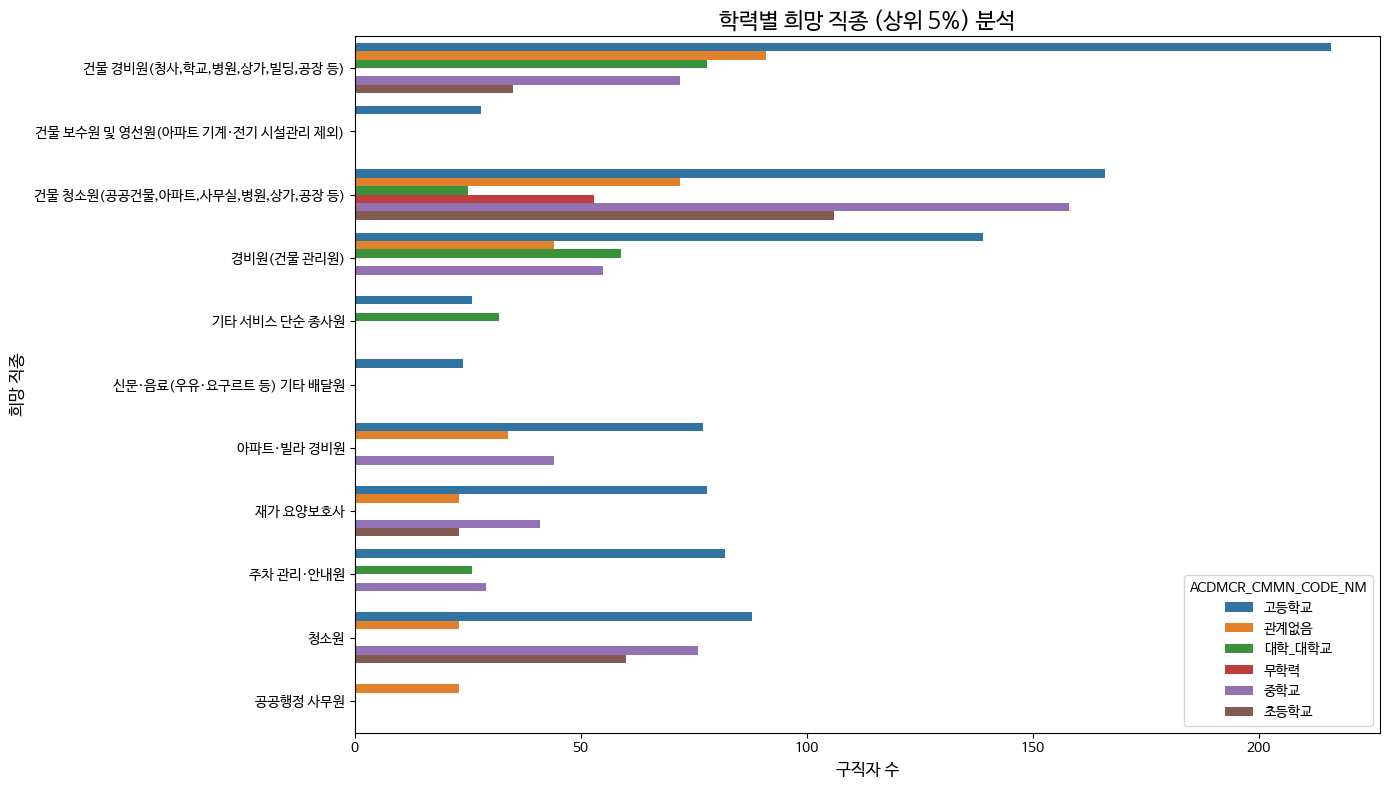

In [ ]:
# 학력별 희망 직종 선호도 분석
education_job_counts = df.groupby(['ACDMCR_CMMN_CODE_NM', 'HOPE_JSSFC_CMMN_CODE_SE_NM_1']).size().reset_index(name='count')

# 전체 직종의 상위 5% 추출
top_5_percent_threshold = education_job_counts['count'].quantile(0.95)
top_5_percent_jobs = education_job_counts[education_job_counts['count'] >= top_5_percent_threshold]

# 상위 5% 직종 선호도 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='HOPE_JSSFC_CMMN_CODE_SE_NM_1', hue='ACDMCR_CMMN_CODE_NM', data=top_5_percent_jobs)
plt.title('학력별 희망 직종 (상위 5%) 분석', fontsize=16)
plt.xlabel('구직자 수', fontsize=12)
plt.ylabel('희망 직종', fontsize=12)
plt.tight_layout()
plt.show()


**5) 희망 근무 지역 시각화**

<ipython-input-18-6668408b5f7e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_area_counts.head(10).values, y=work_area_counts.head(10).index, palette="Blues_r")


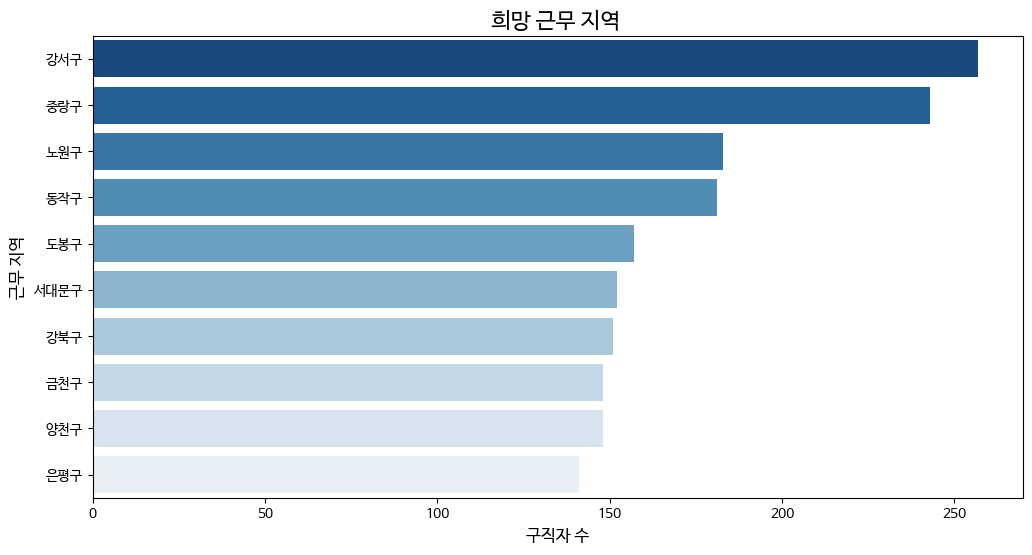

In [ ]:
# 희망 근무 지역 데이터 정리
work_area = pd.concat([df["WORK_AREA_CMMN_CODE_SE_1_1"], df["WORK_AREA_CMMN_CODE_SE_1_2"]], ignore_index=True).dropna()

# 서울 데이터 제외
work_area = work_area[work_area != "서울"]

# 지역별 구직자 수
work_area_counts = work_area.value_counts()

# 상위 10개 지역 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=work_area_counts.head(10).values, y=work_area_counts.head(10).index, palette="Blues_r")
plt.title("희망 근무 지역 ", fontsize=16)
plt.xlabel("구직자 수", fontsize=12)
plt.ylabel("근무 지역", fontsize=12)
plt.show()
